In [52]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.read_csv('D:\\Projects\\kaggle_space_titanic\\data\\train.csv')

__Data Field Descriptions__
- __PassengerId__ - Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group.
- __HomePlanet__ - The planet the passenger departed from, typically their planet of permanent residence.
- __CryoSleep__ - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- __Cabin__ - Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- __Destination__ - The planet the passenger will be debarking to.
- __Age__ - The age of the passenger.
- __VIP__ - Whether the passenger has paid for special VIP service during the voyage.
- __RoomService__, __FoodCourt__, __ShoppingMall__, __Spa__, __VRDeck__ - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- __Name__ - The first and last names of the passenger.
- __Transported__ - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [53]:
split_cabin_array = []
for row in df.Cabin:
    if pd.isnull(row):
        split_cabin_array.append([np.nan, np.nan, np.nan])
    else:
        split_cabin_array.append(row.split('/'))

split_cabin_df = pd.DataFrame(split_cabin_array, columns=['CabinDeck', 'CabinNum', 'CabinSide'])
df = pd.merge(left=df, right=split_cabin_df, left_index=True, right_index=True)
df['CabinNum'] = pd.to_numeric(df['CabinNum'], errors='coerce')
df['CabinNum'] = df['CabinNum'].astype(int, errors='ignore')

In [54]:
# transform categorical columns to onehot
cat_col = ['HomePlanet', 'Destination', 'CabinDeck', 'CabinSide']
for i, col in enumerate(cat_col):
    temp_d = pd.get_dummies(df[col], prefix=col)
    df = pd.merge(left=df, right=temp_d, left_index=True, right_index=True)
    df = df.drop(columns=col)

# transform boolean to binary
bool_col = ['CryoSleep', 'VIP', 'Transported']
df[bool_col] = df[bool_col].replace(True, 1)
df[bool_col] = df[bool_col].replace(False, 0)
#df[bool_col] *= 1

In [55]:
df.columns

Index(['PassengerId', 'CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'CabinNum', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'CabinDeck_A', 'CabinDeck_B', 'CabinDeck_C',
       'CabinDeck_D', 'CabinDeck_E', 'CabinDeck_F', 'CabinDeck_G',
       'CabinDeck_T', 'CabinSide_P', 'CabinSide_S'],
      dtype='object')

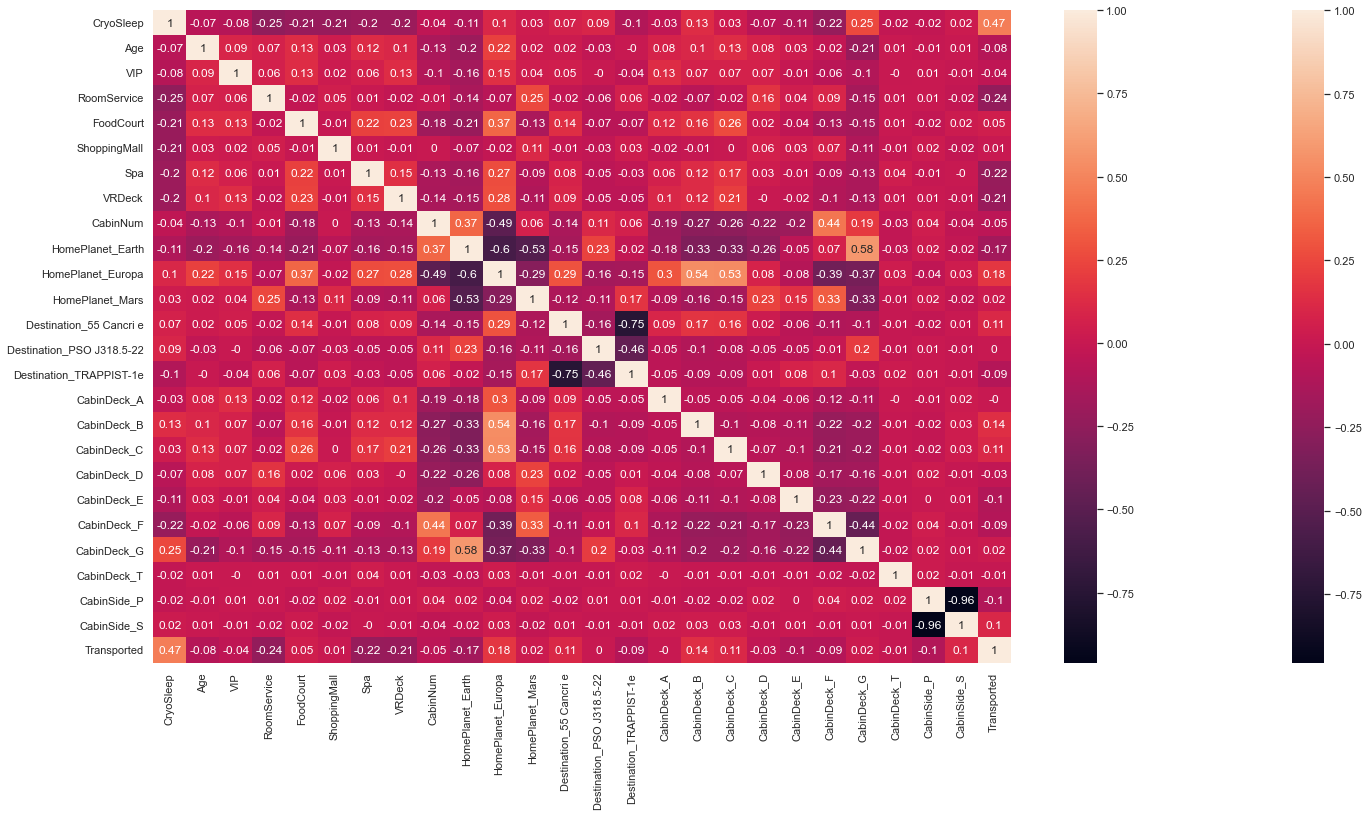

"\ncovMatrix = df[interesting_col].cov().round(2)\nsn.set(rc = {'figure.figsize':(24,12)})\nsn.heatmap(df.cov())\nsn.heatmap(covMatrix, annot=True, fmt='g')\nplt.show()\n"

In [56]:
interesting_col = ['CryoSleep', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'CabinNum', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'CabinDeck_A', 'CabinDeck_B', 'CabinDeck_C',
       'CabinDeck_D', 'CabinDeck_E', 'CabinDeck_F', 'CabinDeck_G',
       'CabinDeck_T', 'CabinSide_P', 'CabinSide_S', 'Transported']
corrMatrix = df[interesting_col].corr().round(2)
sn.set(rc = {'figure.figsize':(24,12)})
sn.heatmap(df.corr())
sn.heatmap(corrMatrix, annot=True)
plt.show()
'''
covMatrix = df[interesting_col].cov().round(2)
sn.set(rc = {'figure.figsize':(24,12)})
sn.heatmap(df.cov())
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()
'''

<AxesSubplot:ylabel='Frequency'>

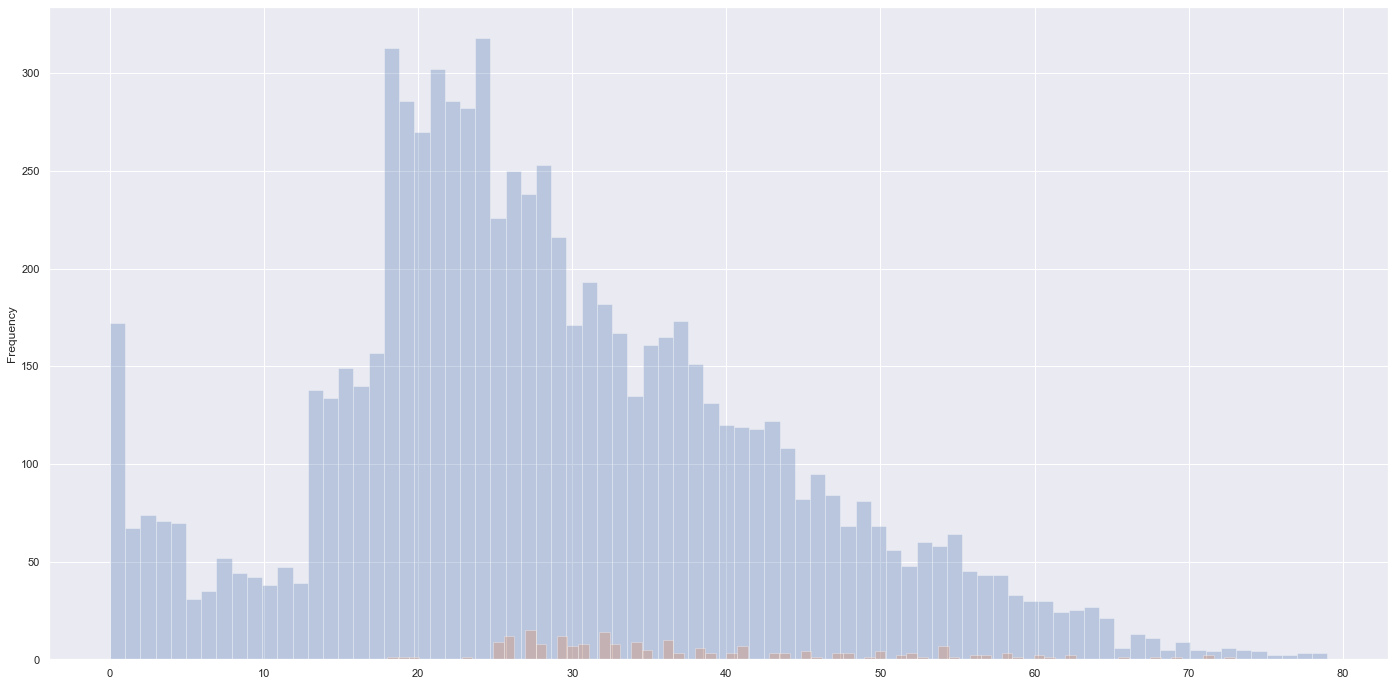

In [57]:
df['Age'][df['VIP'] == 0].plot.hist(alpha=.3, bins=80)
df.Age[df['VIP'] == 1].plot.hist(alpha=.3, bins=80)